# Import the necessary modules

In [22]:
##########################
#Importing necessary Modules
##########################
import urllib.request as urllib2 # to download websites

import numpy as np

import re
import nltk.corpus
import nltk
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import pandas

from bs4 import BeautifulSoup # to parse the websites
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.probability import FreqDist

from textblob import TextBlob
from textblob import TextBlob, Word
from collections import Counter

from nltk.tokenize import word_tokenize

from nltk.tag import pos_tag
from pylab import *



# Get text data from the webpage

In [36]:
# Extracting the text from the page

url = "http://edition.cnn.com/2018/01/21/politics/macron-trump-relationship-intl/index.html"
html = urllib2.urlopen(url).read()

# Using BeautifulSoap

soup = BeautifulSoup(html, "html.parser")
for line in soup(["script", "style"]):     
    line.extract()
    
    
text = soup.get_text()

text1 = str(text)


# Process the text

In [24]:
#tokenize all the words and remove the stop words
words_punt=  [word.lower() for word in word_tokenize(text) if word not in stopwords.words("english")]
#removes punctuations and special charechters
words = [word for word in words_punt if word.isalpha()]




# Frequency Calculation

In [25]:
# frequency distribution of words

# A dataframe with words and frequency


counts = Counter(words)
dic = {'Words': list(counts.keys()), 'Frequency':list(counts.values())}
import pandas as pd


df = pd.DataFrame(dic, columns=['Words','Frequency'] )

# The table for frequency-plotting

dfs= df.sort_values(['Frequency', 'Words'], ascending = False)
df10 = df.head(10)
print(df10)

                        Words  Frequency
0                      macron         14
1                      direct          4
2                relationship          4
3                       trump         19
4         cnnpoliticsbreaking          1
5  ninetrumpmericastatesearch          1
6                      french          3
7                   president          5
8                          by          1
9                      sheena          1


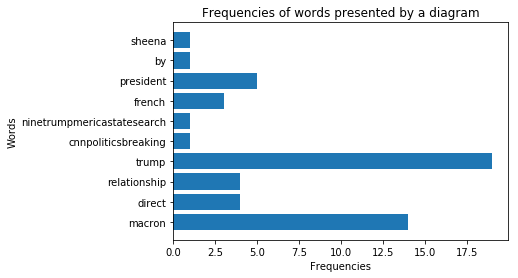

In [26]:
items = df10['Words']
y_pos = np.arange(len(items))
scores = df10['Frequency']
plt.barh(y_pos, scores)
plt.title('Frequencies of words presented by a diagram')
plt.ylabel('Words')
plt.yticks(y_pos, items)
plt.xlabel('Frequencies')
plt.show()


# Calculate the sentiment

In [65]:
# Calculating the sentiment in order to see, whether the text has more positive, negative or neutral words

analyser = SentimentIntensityAnalyzer()
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print(snt)
    return snt
    

snt = print_sentiment_scores(text)

if snt['compound']>0.5:
        print('+'*100)
        print('The text has a positive statement.')
        print('+'*100)       
if snt['compound']<=-0.5:
        print('-'*100)
        print('The text has a negative statement.')
        print('-'*100)
if snt['compound']>-0.5 and snt['neu']<0.5:
        print('.'*100)
        print('The text has a neutral statement.')
        print('.'*100)



{'neg': 0.05, 'neu': 0.849, 'pos': 0.101, 'compound': 0.9901}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The text has a positive statement.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Positive and Negative sentiment words

In [28]:

sid = SentimentIntensityAnalyzer()
pwl=[]
nwl=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in words:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pwl.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        nwl.append(word)
    
print('Positive:', pwl)
print('Negative:', nwl)

Positive: ['humoring', 'agreement', 'strong', 'agreement', 'good', 'good', 'opportunity', 'agreement', 'best', 'save', 'respect', 'strong', 'desire', 'friends', 'interest', 'enjoying', 'strength']
Negative: ['fail', 'disagreed', 'mistake', 'criticized', 'frustrations', 'humiliations', 'foes', 'disagreements', 'distracted']


# Part of speech tagging

In [29]:
#part of speech tagging
pst= nltk.pos_tag(words)

# Adjectives in the list

In [30]:
mylist_adj = []
for list in pst:
    (a,b) = list
    if b in ['JJ', 'JJR', 'JJS']:
         mylist_adj.append(str(list[0]))
print(mylist_adj)

['direct', 'ninetrumpmericastatesearch', 'french', 'direct', 'sheena', 'jordan', 'gmt', 'messenger', 'happening', 'macronreplaymore', 'emmanuel', 'first', 'prolonged', 'french', 'trump', 'forceful', 'light', 'direct', 'i', 'direct', 'i', 'i', 'british', 'trump', 'classical', 'paris', 'last', 'strong', 'several', 'paris', 'withdraw', 'good', 'good', 'big', 'new', 'join', 'loop', 'global', 'celsius', 'former', 'best', 'lengthy', 'certain', 'respect', 'east', 'due', 'due', 'replied', 'mix', 'personal', 'political', 'small', 'french', 'strong', 'white', 'mutual', 'old', 'international', 'new', 'second', 'iran', 'interpreter', 'places', 'common', 'london', 'distracted', 'internal', 'cnn']


# Nouns in the list

In [31]:
mylist_nouns = []
for list in pst:
    (a,b) = list
    if b in ['NN', 'NNP', 'NNS', 'NNPS']:
         mylist_nouns.append(str(list[0]))
print(mylist_nouns)

['macron', 'relationship', 'trump', 'president', 'macron', 'relationship', 'trump', 'mckenzie', 'amanda', 'coakley', 'hkt', 'january', 'world', 'videos', 'macron', 'meeting', 'brussels', 'handshake', 'months', 'president', 'macron', 'president', 'continue', 'sunday', 'relationship', 'trump', 'andrew', 'leaders', 'frank', 'manage', 'convince', 'macron', 'talk', 'politician', 'people', 'agreement', 'moremacron', 'year', 'leaders', 'relationship', 'topics', 'agreement', 'climate', 'change', 'trump', 'plans', 'terms', 'treaty', 'people', 'warns', 'opportunityreplaymore', 'videos', 'warns', 'opportunity', 'i', 'mistake', 'i', 'negotiation', 'china', 'macron', 'paris', 'agreement', 'signatories', 'carbon', 'output', 'degrees', 'president', 'barack', 'obama', 'chance', 'planet', 'things', 'country', 'world', 'accord', 'withdrawal', 'process', 'word', 'use', 'macron', 'trump', 'use', 'word', 'countries', 'immigration', 'lawmakers', 'month', 'year', 'trump', 'everything', 'word', 'use', 'macron

# Positive and Negative adjectives

In [32]:
mylist_adj

sid = SentimentIntensityAnalyzer()
pos_adj_list=[]
neg_adj_list=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in mylist_adj:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pos_adj_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        neg_adj_list.append(word)

# Printing

print('Positive :',pos_adj_list)          
print('Negative :',neg_adj_list)

Positive : ['strong', 'good', 'good', 'best', 'respect', 'strong']
Negative : ['distracted']


In [33]:
mylist_nouns

sid = SentimentIntensityAnalyzer()
pos_nouns_list=[]
neg_nouns_list=[]

# Setting the value of the words,the less it is, the more words will show up, but it won't be so accurate that way 

for word in mylist_nouns:
    if (sid.polarity_scores(word)['compound']) >= 0.3:
        pos_nouns_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.3:
        neg_nouns_list.append(word)

# Printing

print('Positive :',pos_nouns_list)          
print('Negative :',neg_nouns_list)

Positive : ['agreement', 'agreement', 'opportunity', 'agreement', 'desire', 'friends', 'interest', 'strength']
Negative : ['mistake', 'frustrations', 'humiliations', 'foes', 'disagreements']


In [58]:
!pip install --upgrade vaderSentiment


Requirement already up-to-date: vaderSentiment in c:\programdata\anaconda3\lib\site-packages
